## In this project, I am using OpenCV to detect objects in an image 

In [1]:
#importing libraries

import numpy as np;
import matplotlib.pyplot as plt ;
import cv2;
import os;
import torch
from torchvision import models, transforms
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw


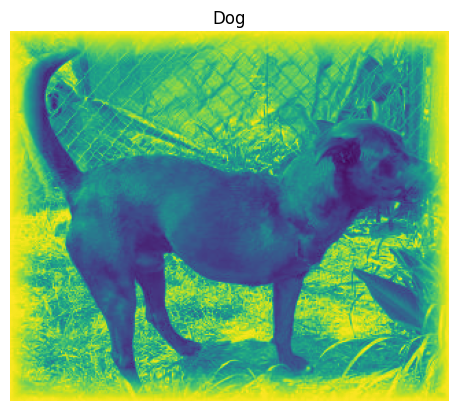

In [2]:
dogsPath = "./PetImages/Dog"
catsPath = "./PetImages/Cat"

dogs = np.array(os.listdir(dogsPath))
cats = np.array(os.listdir(catsPath))

dogImagePath = os.path.join(dogsPath, dogs[1])
dogImg = cv2.imread(dogImagePath)

plt.imshow(cv2.cvtColor(dogImg, cv2.COLOR_BGR2GRAY))
plt.title("Dog")
plt.axis("off")
plt.show()

tensor([19, 18, 24, 16, 64, 20, 21, 90, 19, 25, 16, 18, 16])


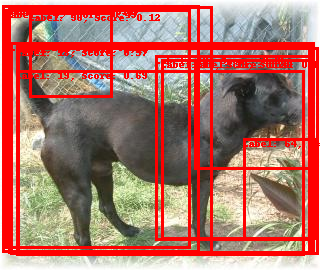

In [10]:
#Pytorch Object Detection

model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

transform = transforms.Compose([
    transforms.ToTensor(),
])


image = Image.open(dogImagePath)
inputTensor = transform(image).unsqueeze(0)


with torch.no_grad():
    predictions = model(inputTensor)

boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

print(labels)

draw = ImageDraw.Draw(image)
for box, label, score in zip(boxes, labels, scores):
    box = [round(float(coord), 2) for coord in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"Label: {label}, Score: {round(float(score), 2)}", fill="red")

image.show()

